In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("utkface_niqe.csv", header=None, names=["filename", "score"])

In [3]:
df.describe()

,score
count,18978.000000
mean,6.296383
std,1.354203
min,1.346968
25%,5.507669
50%,6.438131
75%,7.119004
max,22.793738


In [4]:
df.loc[df['score'].idxmax()]

filename    6_0_2_20170112192934683.png
score                         22.793738
Name: 15094, dtype: object

<Axes: xlabel='None', ylabel='score'>

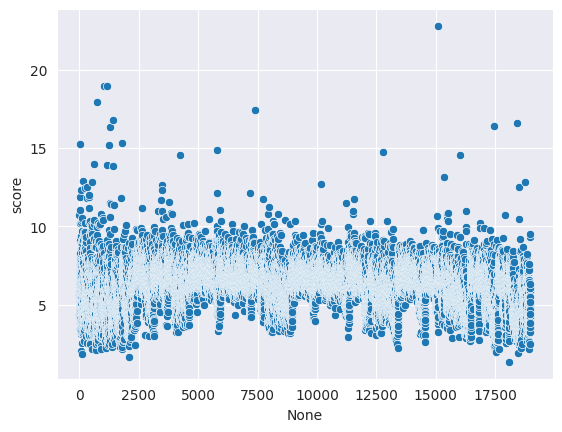

In [5]:
sns.scatterplot(x=df.index, y=df['score'])

In [6]:
value = np.percentile(df['score'], 95)
value

8.22489360322151

In [7]:
ucb_acc_df = pd.read_csv("ucb_accurate.csv", header=None, names=["filename", "score"])

In [8]:
ucb_acc_df.describe()

,score
count,98.000000
mean,6.610483
std,1.765445
min,3.468605
25%,5.360512
50%,6.606546
75%,7.584579
max,13.160861


In [9]:
ucb_mod_df = pd.read_csv("ucb_moderate.csv", header=None, names=["filename", "score"])

In [10]:
ucb_mod_df.describe()

,score
count,90.000000
mean,6.197452
std,1.568334
min,3.051249
25%,5.158657
50%,5.903371
75%,7.081528
max,11.556878


In [11]:
ucb_imprecise_df = pd.read_csv("ucb_imprecise.csv", header=None, names=["filename", "score"])

In [12]:
ucb_imprecise_df.describe()

,score
count,83.000000
mean,6.611647
std,1.881071
min,3.091283
25%,5.283581
50%,6.431613
75%,7.684366
max,12.695793


<Axes: xlabel='None', ylabel='score'>

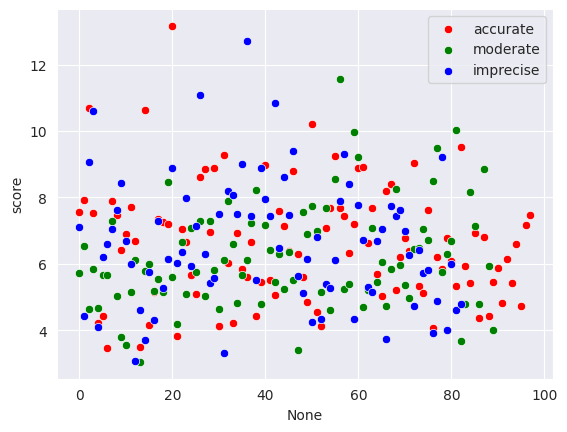

In [13]:
# Create a list of dataframes
dataframes = [ucb_acc_df, ucb_mod_df, ucb_imprecise_df]

# Create a list of colors for the dataframes
colors = ['red', 'green', 'blue']

# Create the scatterplot
sns.scatterplot(x=ucb_acc_df.index, y='score', data=ucb_acc_df, color=colors[0], label='accurate')
sns.scatterplot(x=ucb_mod_df.index, y='score', data=ucb_mod_df, color=colors[1], label='moderate')
sns.scatterplot(x=ucb_imprecise_df.index, y='score', data=ucb_imprecise_df, color=colors[2], label='imprecise')

In [14]:
combined_df = pd.concat([ucb_acc_df, ucb_mod_df, ucb_imprecise_df])
combined_df

,filename,score
0,0_0_1_20231111200646265384.png,7.549195
1,0_0_1_20231111200709733806.png,7.927759
2,0_0_1_20231111200737758999.png,10.698085
3,0_0_1_20231111200827493751.png,7.546732
4,0_0_1_20231111200949641359.png,4.222256
...,...,...
78,7_1_1_20231113153127607663.png,9.205098
79,7_1_1_20231113153154126106.png,4.021356
80,7_1_1_20231113153218257091.png,5.989838
81,7_1_1_20231113153247723432.png,4.599254


In [17]:
value = 8.7
combined_df['accepted'] = combined_df['score'] <= value
combined_df

,filename,score,accepted
0,0_0_1_20231111200646265384.png,7.549195,True
1,0_0_1_20231111200709733806.png,7.927759,True
2,0_0_1_20231111200737758999.png,10.698085,False
3,0_0_1_20231111200827493751.png,7.546732,True
4,0_0_1_20231111200949641359.png,4.222256,True
...,...,...,...
78,7_1_1_20231113153127607663.png,9.205098,False
79,7_1_1_20231113153154126106.png,4.021356,True
80,7_1_1_20231113153218257091.png,5.989838,True
81,7_1_1_20231113153247723432.png,4.599254,True


In [18]:
combined_df.to_csv("combined_niqe_results.csv", index=False)